<a href="https://colab.research.google.com/github/kyleishaumbay/Umbay-Hierro-CSCI-161.03-UV2/blob/main/%5BUmbay%26Hierro%5D_3_1_Term_Frequency_Language_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load libraries

In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data

In [ ]:
corpus = pd.read_csv('https://raw.githubusercontent.com/kyleishaumbay/Umbay-Hierro-CSCI-161.03-UV2/main/datasets/elonmusk_cleaned_corpus.csv')
corpus.head()

,title,link,date_published,text,like_count,reply_parent_id,source,cleaned_text
0,Taibbi is a journalist paid and bought by bill...,https://www.youtube.com/watch?v=BB__743Jfm0&lc...,2025-09-09 20:34:11,Taibbi is a journalist paid and bought by bill...,0,NaN,youtube,Taibbi journalist billionaire I SB Taibi usefu...
1,@@margobarranti Hello dear... I really appreci...,https://www.youtube.com/watch?v=kzlUyrccbos&lc...,2025-09-09 20:26:01,@@margobarranti Hello dear... I really appreci...,0,Ugy6M6SUBHCUtkU3RSh4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...
2,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:05:41,Hello dear... I really appreciate your likes a...,0,UgzYT3Etk-P5otJtTKF4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...
3,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:40,Hello dear... I really appreciate your likes a...,0,UgyIKvl9rpFtLHpw6Ul4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...
4,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:28,Hello dear... I really appreciate your likes a...,0,UgyB14bghklGyJpGm2N4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...


##Remove Stopwords

Stopwords like 'the', 'a', 'is', etc., are common words that don't usually carry much meaning. Removing them helps to focus on the more significant words in our text data. This is particularly useful for creating word clouds since we want to identify the most frequent or important terms. By removing stopwords, we get a clearer picture of the key topics and themes in our corpus.

1.   List item
2.   List item



In [ ]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Add 'musk' to the stopwords list
stop_words.add('musk')

# Function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        # Convert to lowercase before removing stopwords
        return ' '.join([word for word in text.lower().split() if word not in stop_words])
    return text

# Apply the function to the 'cleaned_text' column
corpus['cleaned_text'] = corpus['cleaned_text'].apply(remove_stopwords)

# Display the updated dataframe
corpus.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,link,date_published,text,like_count,reply_parent_id,source,cleaned_text
0,Taibbi is a journalist paid and bought by bill...,https://www.youtube.com/watch?v=BB__743Jfm0&lc...,2025-09-09 20:34:11,Taibbi is a journalist paid and bought by bill...,0,NaN,youtube,taibbi journalist billionaire sb taibi useful ...
1,@@margobarranti Hello dear... I really appreci...,https://www.youtube.com/watch?v=kzlUyrccbos&lc...,2025-09-09 20:26:01,@@margobarranti Hello dear... I really appreci...,0,Ugy6M6SUBHCUtkU3RSh4AaABAg,youtube,hello dear appreciate comment touch send direc...
2,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:05:41,Hello dear... I really appreciate your likes a...,0,UgzYT3Etk-P5otJtTKF4AaABAg,youtube,hello dear appreciate comment touch send direc...
3,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:40,Hello dear... I really appreciate your likes a...,0,UgyIKvl9rpFtLHpw6Ul4AaABAg,youtube,hello dear appreciate comment touch send direc...
4,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:28,Hello dear... I really appreciate your likes a...,0,UgyB14bghklGyJpGm2N4AaABAg,youtube,hello dear appreciate comment touch send direc...


# Bag of Words (BoW) Language Model

In [ ]:
bow_vectorizer = CountVectorizer(
  # unigram
  # ngram_range=(1, 1),
  # bigram
  ngram_range=(1, 2),
  # trigram
  # ngram_range=(1, 3),
)

# Drop rows with missing values in the 'cleaned_text' column
corpus_cleaned = corpus.dropna(subset=['cleaned_text'])

doc2vec_bow = bow_vectorizer.fit_transform(corpus_cleaned['cleaned_text'])
doc2vec_bow = pd.DataFrame(doc2vec_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())
doc2vec_bow.head()

,aa,aa lane,aaaaah,aaaaah alien,aaaahhrr,aaatomic,aaatomic ackan,aam,aam america,aamake,...,zizek win,zone,zone actually,zuck,zuck human,zuckerberg,zuckerberg conversation,zuckerberg donate,zwitter,zwitter beginning
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Save to file
doc2vec_bow.to_pickle('doc2vec_bow.pkl')

# Load from file
doc2vec_bow = pd.read_pickle('doc2vec_bow.pkl')

# TF-IDF Language Model

In [ ]:
tfidf_vectorizer = TfidfVectorizer(
  # unigram
  # ngram_range=(1, 1),
  # bigram
  ngram_range=(1, 2),
  # trigram
  # ngram_range=(1, 3),
)

# Drop rows with missing values in the 'cleaned_text' column
corpus_cleaned = corpus.dropna(subset=['cleaned_text'])

doc2vec_tfidf = tfidf_vectorizer.fit_transform(corpus_cleaned['cleaned_text'])
doc2vec_tfidf = pd.DataFrame(doc2vec_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
doc2vec_tfidf.head()

,aa,aa lane,aaaaah,aaaaah alien,aaaahhrr,aaatomic,aaatomic ackan,aam,aam america,aamake,...,zizek win,zone,zone actually,zuck,zuck human,zuckerberg,zuckerberg conversation,zuckerberg donate,zwitter,zwitter beginning
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Save to file
doc2vec_tfidf.to_pickle('doc2vec_tfidf.pkl')

# Load from file
doc2vec_tfidf = pd.read_pickle('doc2vec_tfidf.pkl')

# Analysis

## Top n-grams per document

In [ ]:
def top_n_grams(document, top_n=10):
  return document.sort_values(ascending=False).index[:top_n].tolist()

In [ ]:
doc2vec_bow.apply(lambda document:
                  top_n_grams(document, top_n=5),
                  axis=1)

,0
0,"[idiot, cohost katie, cohost, journalist billi..."
1,"[comment touch, touch send, hello dear, messag..."
2,"[comment touch, touch send, hello dear, messag..."
3,"[comment touch, touch send, hello dear, messag..."
4,"[comment touch, touch send, hello dear, messag..."
...,...
3041,"[amount, full, co, two, less]"
3042,"[muskwatch, planner mind, planner, plank polit..."
3043,"[skt, skt skt, planner mind, planner, plank po..."
3044,"[ago, thonk, ago thonk, planner mind, planner]"


In [ ]:
doc2vec_tfidf.apply(lambda document:
                    top_n_grams(document, top_n=5),
                    axis=1)

,0
0,"[katie halper, halper, idiot podcast, podcast ..."
1,"[comment touch, direct message, touch send, he..."
2,"[comment touch, direct message, touch send, he..."
3,"[comment touch, direct message, touch send, he..."
4,"[comment touch, direct message, touch send, he..."
...,...
3041,"[amount, full, original full, full amount, co op]"
3042,"[muskwatch, planner mind, planner, plank polit..."
3043,"[skt, skt skt, planner mind, planner, plank po..."
3044,"[thonk, ago thonk, ago, planner mind, planner]"


## Top n-grams in the corpus

In [ ]:
# Wordcloud using BoW and TF-IDF
def plot_wordcloud(data, title):
  wordcloud = WordCloud(
    width=800, height=400, background_color='white'
  ).generate_from_frequencies(data)
  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(title)
  plt.show()

elon         602
trump        358
party        170
tesla        159
world        123
money        120
human        106
america       99
president     93
company       91
dtype: int64


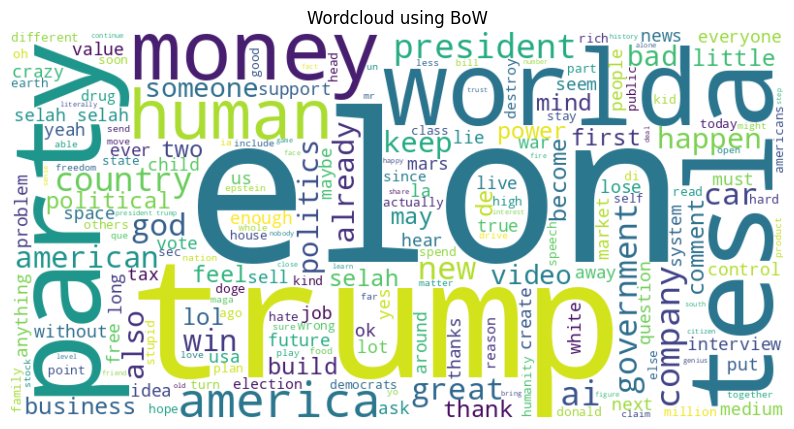

In [ ]:
bow_frequencies = doc2vec_bow.sum(axis=0).sort_values(ascending=False)
print(bow_frequencies.head(10))
plot_wordcloud(bow_frequencies, 'Wordcloud using BoW')

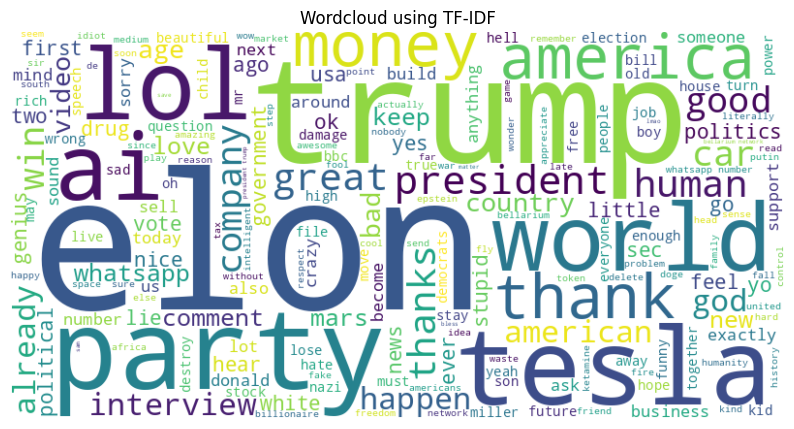

In [ ]:
tfidf_frequencies = doc2vec_tfidf.sum(axis=0).sort_values(ascending=False)
tfidf_frequencies.head(10)
plot_wordcloud(tfidf_frequencies, 'Wordcloud using TF-IDF')

Based on both word clouds, the top three most frequent words in our corpus are 'elon', 'trump', and 'party'.